# Applied Machine Learning: Module 3 (Evaluation)

## Evaluation for Classification

We'll be focusing first on the widely used case of evaluating binary classification. And then we'll look at evaluation for the more general case of multi-class evaluation as well as regression. 

### Preamble

We'll start here using the digits dataset, which has images of handwritten digits labeled with ten classes, representing the digits zero through nine. As we can see by letting the dataset and then computing the count of instances in each class, using numpy's `bincount method`, there are roughly the same number of instances in each class. So this dataset has balanced classes.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


However with this digits dataset, what we're going to do is create a new dataset with two imbalanced classes by labelling all digits that are not the digit $1$ as the negative class with label `0`, and digits that are $1$ as the positive class, label `1`. So what we're doing here is dump the first few entries from the original labels along with the new binary label, so we can see the imbalance visually.

In [2]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


Now when we use `bincount`, we can see that there are about 1,600 negative examples, but only 182 positive examples. So indeed, we have a dataset that is class imbalanced

In [3]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182], dtype=int64)

Now let's create a train test partition on this imbalanced set. And then we'll train a support vector machine classifier with these binary labels using the radial basis function as a kernel. We get the accuracy using the score method, and we can see this is just over 90%. Again at first glance, 90% accuracy for a classifier seems pretty good. However, now let's create a Dummy Classifier that correctly reflect the class imbalance to see if 90% really is that impressive.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

D:\Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9088888888888889

### Dummy Classifiers

scikit-learn makes it easy to create a dummy classifier just by using the `DummyClassifier`. `DummyClassifier` is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

Dummy classifiers are called such because they don't even look at the data to make a prediction. They simply use the strategy that you instruct them to use, when creating them. In fact, when you create the classifier, you set the strategy argument to tell it what rule of thumb to use to make its predictions. So here, we set this to the most frequent strategy to predict the most frequent class.

The Dummy Classifier here is used just like a regular classifier. So to prepare it for prediction, we call the fit method on the x_train and y_train variables that hold the training set instances and labels. Finally, just like a regular classifier, we can call the predict method to make predictions on the test set.

In [5]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Now we can call the usual score method to get the accuracy of the DummyClassifier's constant negative prediction.

In [6]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

And we can see it's also 90%, the same as our earlier support vector machine classifier with radio bases function kernel. So that support vector classifier was actually performing only very slightly better than the Dummy Classifier.

In [7]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

You should not use a dummy classifier for real classification problems, but it does provide a useful sanity check in point of comparison. 

### Confusion matrices

#### Binary (two-class) confusion matrix

Scikit-learn makes it easy to compute a confusion matrix for our classifier. Here, we import the `confusion_matrix` class from `sklearn.metrics`. We're going to use the same training set from the digits data set with the binary imbalance labels that we created earlier. To get the confusion matrix, we simply pass the `y_test` set of predicted labels and the `y_predicted` set of predicted labels and then print the output. 

The order of the cells in the matrix output in the following order: true negative and false negative are in the first column, and true positive and false positive are in the second column. In particular, the successful predictions of the classifier are on the diagonal where the true class matches the predicted class. The cells off the diagonal represent errors of different types.

In [8]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


What we can see here is that the right column, that represent cases where the classifier predicted the positive class, is all zero. This makes sense for this dummy classifier because it's always predicting the negative class, the most frequent one. We see that 407 instances are true negatives, and there are 43 errors that are false negatives.

Below we apply the stratified Dummy Classifier that gives random output in proportion to the ratio labels in the training set. Now the right column is no longer all zero because this Dummy Classifier does occasionally predict the positive class. 

In [9]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[369  38]
 [ 38   5]]


In the below case, we'll apply a support vector classifier with linear kernel and seed parameter equal to one. We note that looking along the diagonal compared to the stratified dummy classifier above, the support vector classifier has more correct predictions on the same data set.

In [10]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


Likewise, we can apply a logistic regression classifier, and that obtains similar results to the support vector classifier.

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


D:\Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


And finally, we can apply a decision tree classifier, and look at the confusion matrix that results from that. One thing we notice is, that unlike the support vector or logistic regression classifier, which had balanced numbers of false negatives and false positives. The decision tree makes more than twice as many false negative errors, 17 of them actually, as false positive errors, of which there are 7.

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Evaluation metrics for binary classification

- TN: True Negative

- FN: False Negative

- FP: False Positive

- TP: True Positive

- Accuracy: What we're used to seeing, the accuracy

- Precision: Making sure we get the minimum number of false positives (would rather have false negatives)

- Recall: Making sure we get the minimum number of false negatives (would rather have false positives)

- Specificity (or False Positive Rate, ie FPR): This gives us the fraction of all negative instances that the classifier incorrectly identifies as positive

- F1: Combines precision and recall into a single number between 0 to 1

Let's take a look now at how we can compute these evaluation metrics in Python using scikit-learn. `sklearn.metrics` provides functions for computing accuracy, precision, recall, and F1 score. The input to these functions is the same. The first argument here, `y_test`, is the array of true labels of the test set data instances and the second argument is the array of predicted labels for the test set data instances. Here we're using a variable called `tree_predicted` which are the predicted labels using the decision tree classifier in the previous notebook step. 

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) = (2 * TP)/(2*TP + FN + FP)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


It's often useful when analyzing classifier performance to compute all of these metrics at once. So, `sklearn.metrics` provides a handy `classification_report` function. Like the previous core functions, classification report takes the true and predicted labels as the first two required arguments. 

In [14]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

   micro avg       0.95      0.95      0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



It also takes some optional arguments that control the format of the output. Above, we use the target names option to label the classes in the output table. You can take a look at the scikit-learn documentation for more information on the other output options. The last column, `support`, shows the number of instances in the test set that have that true label. 

Below we show classification reports for four different classifiers on the binary digit classification problem. The first set of results is from the dummy classifier and we can see that as expected both precision and recall for the positive class are very low since the dummy classifier is simply guessing randomly with low probability of predicting that positive class for the positive instances.

In [15]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.91      0.91      0.91       407
           1       0.12      0.12      0.12        43

   micro avg       0.83      0.83      0.83       450
   macro avg       0.51      0.51      0.51       450
weighted avg       0.83      0.83      0.83       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

   micro avg       0.98      0.98      0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.86      0.86      0.86        43

   micro avg       0.97      0.97      0.97       450
   macro avg       0.92      0.92      0.92       450
weighted avg 

### Decision functions

Many classifiers in scikit learn can provide information about the uncertainty associated with a particular prediction either by using the decision function method or the predict proba method. When given a set of test points, the decision function method provides for each one a classifier score value that indicates how confidently classifier predicts the positive class, so there will be large magnitude positive scores for those points, or it predicts a negative class there'll be large magnitude negative scores for negative points.

Here's an example showing the first few instances from our classification problem using a logistic regression classifier. We can see the instances in the negative class often have large magnitude negative scores. And indeed the instances in the positive class has positive scores from the logistic regression classifier.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

D:\Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[(0, -23.176547400757663),
 (0, -13.541223742469006),
 (0, -21.72250047336062),
 (0, -18.907578437722535),
 (0, -19.736034587372778),
 (0, -9.749345951179265),
 (1, 5.23490021249531),
 (0, -19.30716117885968),
 (0, -25.101015601857377),
 (0, -21.827250934235906),
 (0, -24.150855663826746),
 (0, -19.576844844946265),
 (0, -22.574902551102674),
 (0, -10.823739601445064),
 (0, -11.912425566043064),
 (0, -10.97956652705531),
 (1, 11.205846086251944),
 (0, -27.645770221552823),
 (0, -12.859636015637092),
 (0, -25.848590145556187)]

Likewise, the predict proba function provides predicted probabilities of class membership. Here's an example of getting prediction probabilities for the test instances for the same logistic regression classifier. 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

D:\Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[(0, 8.60108727067405e-11),
 (0, 1.3155903495453823e-06),
 (0, 3.6816111034009875e-10),
 (0, 6.1452989618944584e-09),
 (0, 2.683793414513379e-09),
 (0, 5.832940124078156e-05),
 (1, 0.9947008742687163),
 (0, 4.1210362715903745e-09),
 (0, 1.2553575357627774e-11),
 (0, 3.3154719959007555e-10),
 (0, 3.2465093048358345e-11),
 (0, 3.1469099051059103e-09),
 (0, 1.56980024484208e-10),
 (0, 1.992053353707062e-05),
 (0, 6.706507243234968e-06),
 (0, 1.70461945380572e-05),
 (1, 0.9999864056960567),
 (0, 9.853591296551983e-13),
 (0, 2.600937459498366e-06),
 (0, 5.944289259618554e-12)]

You can see that many entries with a positive label of one, have a high probability like 0.995. While many negative label instances have a very low prediction probability. Note that not all models provide useful probability estimates of this type. For example, a model that was over-fit to a trending set might provide overly optimistic high probabilities that were in fact not accurate.

Now, we can use these decision scores or prediction probabilities for getting more complete evaluation picture of a classifiers performance. For a particular application, we might pick a specific decision threshold depending on whether we want the classifier to be more or less conservative about making false-positive or false-negative errors. It might not be entirely clear when developing a new model, what the right decision threshold would be, and how that choice will affect evaluation metrics like precision and recall.

### Precision-recall curves

Precision-Recall Curves are very widely used evaluation method from machine learning. The x axis shows precision and the y axis shows recall. Now an ideal classifier would be able to achieve perfect precision of 1.0 and perfect recall of 1.0. And in general, with precision recall curves, the closer in some sense, the curve is to the top right corner, the more preferable it is, and the more beneficial the tradeoff it gives between precision and recall.

Below we plot one of these curves for the logistic regression example from above.

<IPython.core.display.Javascript object>


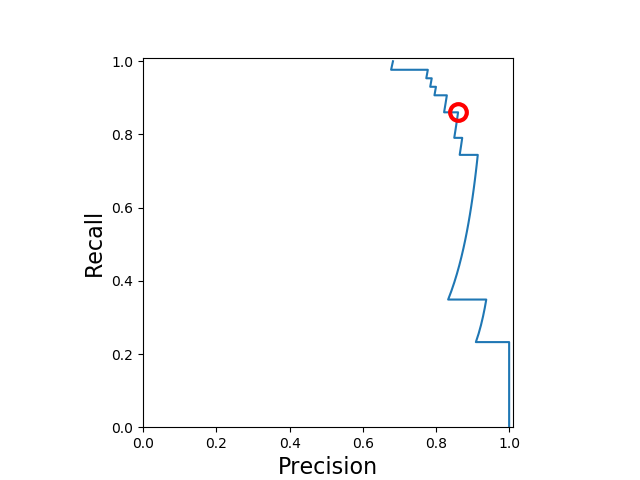

D:\Python\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [18]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

The red circle indicates the precision and recall that's achieved when the decision threshold is zero. So you can see that in this particular application there is a general downward trend. So as the precision of the classifier goes up, the recall tends to go down. 

In this particular case you'll see also that It's not exactly a smooth curve. There are some jagged edges, and in fact the jumps tend to get a little bigger as we approach maximum precision. This is a consequence of how the formulas for precision and recall are computed. They use discrete counts that include the number of true positives. And so as the decision threshold increases, there are fewer and fewer points that remain as positive predictions. So the fractions that are computed for these smaller numbers can change pretty dramatically with small changes in the decision threshold, and that's why these sort of trailing edges of the Precision-recall curve can appear a bit jagged when you plot them.

### ROC curves, Area-Under-Curve (AUC)

**ROC** curves or **receiver operating characteristic curves** are a very widely used visualization method that illustrate the performance of a binary classifier. ROC curves on the X-axis show a classifier's False Positive Rate so that would go from 0 to 1.0, and on the Y-axis they show a classifier's True Positive Rate so that will also go from 0 to 1.0. 

The ideal point in ROC space is one where the classifier achieves zero, a false positive rate of zero, and a true positive rate of one. So that would be the upper left corner of the plot. So just as in the precision recall case, as we vary decision threshold, we'll get different numbers of false positives and true positives that we can plot on a chart.

D:\Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


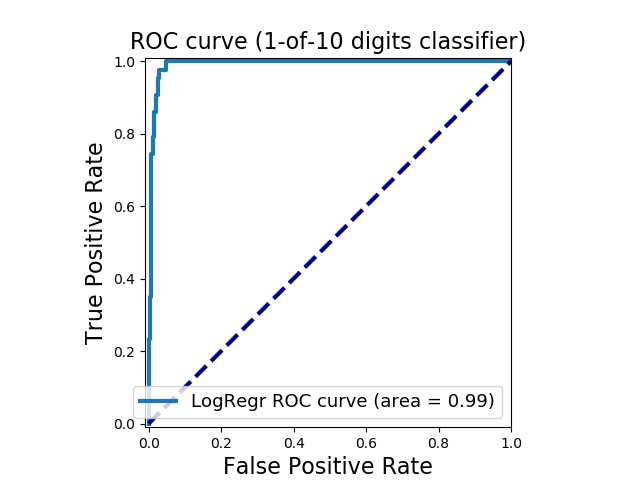

D:\Python\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [19]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

The dotted line here is the classifier curve that results from a classifier that randomly guesses the label for a binary class. So the dotted line here is used as a base line. A bad classifier will have performance that is close to this random curve (the dotted line). A reasonably good classifier will give an ROC curve that is consistently better than random across all decision threshold choices. And finally an excellent classifier would be one like the one plotted above, which is way up into the left. This particular example is the logistic regression classifier previously used in this notebook.

We can qualify the goodness of a classifier by looking at how much area there is underneath the curve. We use something called area under the curve, AUC. That's the single number that measures this total area underneath the ROC curve as a way to summarize a classifier's performance. So, an AUC of zero represents a very bad classifier, and an AUC of 1 will represent an optimal classifier.

<IPython.core.display.Javascript object>


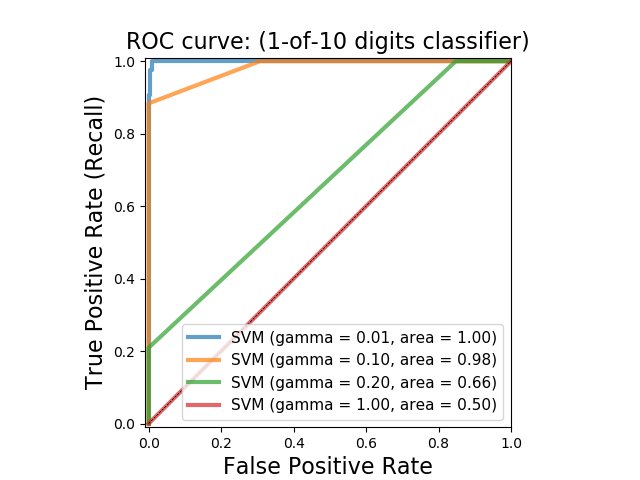

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


D:\Python\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [20]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### Evaluation measures for multi-class classification

#### Multi-class confusion matrix

Now that we've looked at evaluation of binary classifiers, let's take a look at how the more general case of multi class classification is handled in evaluation. So in may respects, multi-class evaluation is a straightforward extension of the methods we use in binary evaluation. Instead of two classes, we have multiple classes. So, the results for multi-class evaluation amount to a collection of true verses predicted binary outcome per class. And just as we saw in the binary case, you can generate confusion matrices in the multi-class case. They're especially useful when you have multiple classes, because there are many different kinds of errors that result from one true class being predicted as a different class. Now the one area, which is worth a little more examination is how averaging across classes takes place.

The number of instances for each class is important to consider. So just as we're all interested in how to handle imbalance classes in the binary case, it's important as you will see to consider similar issues of how the support for classes might vary to a large or small extent across multiple classes. There is a case of multi-label classification in which each instance could have multiple labels.

The multi-class confusion matrix is a straightforward extension of the binary classifier two by two confusion matrix. For example, in our digits data set, there are ten classes for the digits, zero through nine. So, the ten class confusion matrix is a ten by ten matrix with the true digit class indexed by row and the predicted digit class indexed by column. As with the two by two case, the correct predictions by the classifier are all along the diagonal and misclassifications are off the diagonal.

Below we have an example based on a support vector classifier with linear kernel. We can see here that most of the predictions are correct with only a few misclassifications here and there. 

<IPython.core.display.Javascript object>


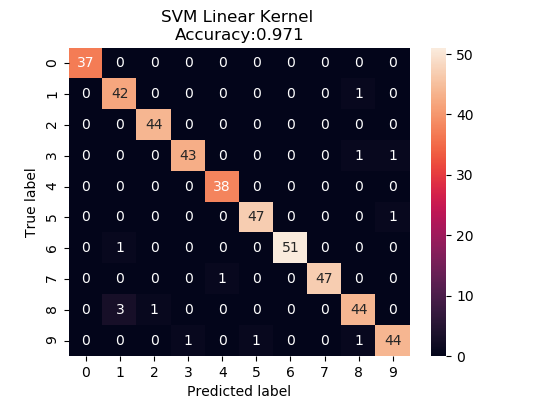

Text(0.5, 14.722222222222216, 'Predicted label')

In [21]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

The most frequent type of mistake here is apparently misclassifying the true digit, eight as a predicted digit one which happened three times. And indeed, the overall accuracy is high, about 97% as shown here. 

As an aside, it's sometimes useful to display a confusion matrix as a heat map in order to highlight the relative frequencies of different types of errors. So, we included the code to generate that above. For comparison, we also included a second confusion matrix on the same dataset for another support vector classifier that does much worse in a distinctive way. The only change is to use an RBF, radial basis function kernel, instead of a linear kernel. The code for this is run below. 

D:\Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<IPython.core.display.Javascript object>


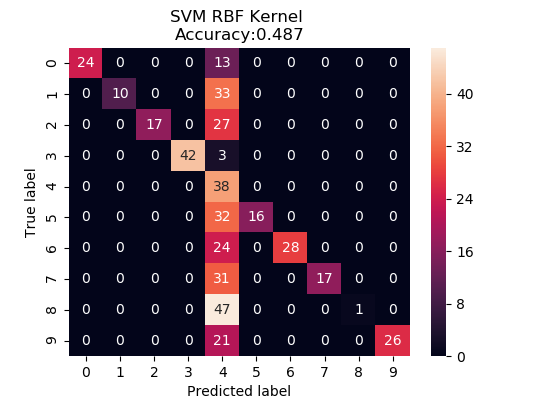

In [22]:
svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

While we can see for the accuracy number were about 43% below the confusion matrix that the classifier is doing much worse than the linear kernel, that single number doesn't give much insight into why.

Looking at the confusion matrix, however, reveals that for every true digit class, a significant fraction of outcomes are to predict the digit four. Clearly, something is broken with this model and we picked this second example just to show an extreme example of what you might see when things go quite wrong.

Seeing patterns like this in a confusion matrix could give you valuable clues about possible problems, say in the feature pre-processing for example. So as a general rule of thumb as part of model evaluation, always looking at the confusion matrix for your classifier. 

#### Multi-class classification report

Next, just as in the binary case, you can get a classification report that summarizes multiple evaluation metrics for a multi-class classifier with an average metric computed for each class. Below is the code we would use to obtain the classification report. 

In [23]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        37
           1       1.00      0.23      0.38        43
           2       1.00      0.39      0.56        44
           3       1.00      0.93      0.97        45
           4       0.14      1.00      0.25        38
           5       1.00      0.33      0.50        48
           6       1.00      0.54      0.70        52
           7       1.00      0.35      0.52        48
           8       1.00      0.02      0.04        48
           9       1.00      0.55      0.71        47

   micro avg       0.49      0.49      0.49       450
   macro avg       0.91      0.50      0.54       450
weighted avg       0.93      0.49      0.54       450



#### Micro- vs. macro-averaged metrics

If you have forgotten how these are calculated, simply google the difference (it's easy to understand). But we touch on their differences below.

If the classes have about the same number of instances, macro and micro-average will be about the same. If some classes are much larger, have more instances than others and you want to weight your metric toward the largest ones, use micro-averaging. If you want to weight your metric towards the smallest classes, use macro-averaging. If the micro-average is much lower than the macro-average, then examine the larger classes for poor metric performance. If the macro-average is much lower than the micro-average, then you should examine the smaller classes to see why they have poor metric performance.

Below we use the average parameter on the scoring function. In the first example, we used the precision metric and specify whether we want micro-average precision which is the first case or macro-average precision in the second case.

In [24]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.49 (treat instances equally)
Macro-averaged precision = 0.91 (treat classes equally)


In this second example, we use the f1 metric and compute micro and macro-averaged f1.

In [25]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.49 (treat instances equally)
Macro-averaged f1 = 0.54 (treat classes equally)


### Regression evaluation metrics

In theory, we could apply the same type of error analysis and more detailed evaluation to regression that we applied for classification. In practice though it turns out that for most applications of regression, distinguishing between these types of different errors is not as important. This simplifies evaluation for regression quite a bit.

In most cases, the default r squared score that's available for regression and scikit-learn and that summarizes how well future instances will be predicted is adequate for most tasks. 

As a reminder, the r2_score for perfect predictor is 1.0. And for a predictor that always output the same constant value, the r2_score is 0.0. The r2_score despite the squared in the name that suggests it's always positive does have the potential to go negative for bad model fits, such as when fitting non-linear functions to data.

There are a few alternative regression devaluation metrics you should be aware of that work differently than the r2_score. Mean absolute error takes the mean absolute difference between the target and predicted values. In machine running terms this corresponds to the expected value of L1 norm loss. This is sometimes used to asses forecast outcomes for regression in time series analysis. Mean squared error takes the mean squared difference between the target and predicted values and this corresponds to the expected value of the L2 norm loss. This is widely used for many regression problems and larger errors have correspondingly larger squared contributions to the mean error. Like mean absolute error, mean squared error doesn't distinguish between over and under estimates.

Finally one situation that does arise quite often is the existence of outliers in the data, which can have unwanted influence on the overall r squared or mean score value. So in those cases, when ignoring outlier is important, you can use the median absolute error score, which is robust with the presence of outliers because it uses the median of the error distribution rather than the mean.

We saw how using how dummy classifiers could give us simple but useful baselines to compared against when evaluating a classifier. The same functionality exist for regression. There's a dummy regressor class that provides predictions using simple strategies that do not look at the input data.

The below example shows a scatter plot using data based on a single input variable, which is plotted along the x axis from the diabetes data set. The points are the data instances from the test split and form a cloud that looks like it may trend down slightly to the right. The green line, which is also labeled fitted model is the default linear regression that was fit to the training points. We can see that it’s not a particularly strong fit to the test data. The red line labeled dummy mean, shows a linear model that uses the strategy of always predicting the mean of the training data. This is an example of a dummy regressor.

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


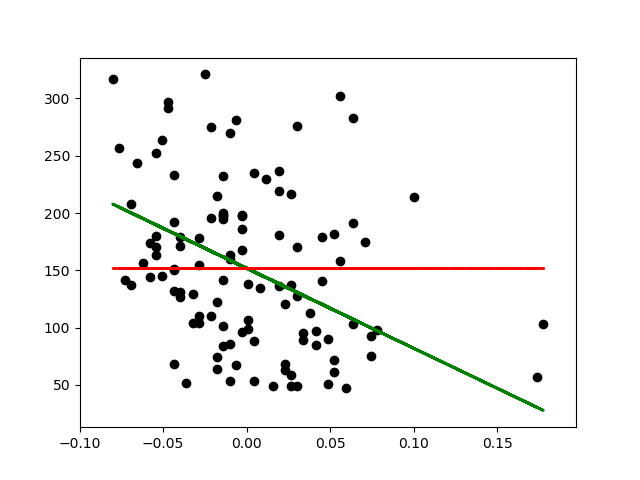

In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

To create the dummy regressor you create, fit with the training data, and then call predict on the test data. Although again, like the dummy classifier you should not use the dummy regressor for actual problems. Its only use is to provide a baseline for comparison.

Looking at the regression metrics output from the linear model compared to the dummy model. We can see that as expected the dummy regressor achieves an r squared score of 0. Since it always makes a constant prediction without looking at the output.

In this instance the linear model provides only slightly better fit than the dummy regressor, according to both mean squared error and the r2_score.

### Model selection using evaluation metrics

Now that you've seen a number of different evaluation metrics for both binary and multiclass classification, let's take a look at how you can apply them as criteria for selecting the best classifier for your application, otherwise known as model selection. 

So how do you apply the new metrics you've learned about here? Scikit-learn makes this very easy. You simply add a scoring parameter that's set to the string with the name of the evaluation metric you want to use. Let's first look at an example using the scoring parameter for cross-validation.

#### Cross-validation example

Here we have a cross-validation example where we're running five folds using a support vector classifier with a linear kernel and C parameter set to one. The first call to cross-val score just uses default accuracy as the evaluation metric. The second call uses the scoring parameter using the string 'roc_auc', and this will use AUC as the evaluation metric. The third call sets the scoring parameter to 'recall', to use that as the evaluation metric. You can see the resulting list of five evaluation values, one per fold for each metric. Now, here we're not doing any parameter tuning we're simply evaluating our model's average performance across multiple folds.

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


#### Grid search example

Now, in this grid search example we use a support vector classifier that uses a radial basis function kernel. And the critical parameter here is the gamma parameter that intuitively sets the radius or width of influence of the kernel. We use GridSearchCV to find the value of gamma that optimizes a given evaluation metric in two cases. In the first case, we just optimize for average accuracy; in the second case we optimize for AUC. In this particular case the optimal value of gamma happens to be the same for both evaluation metrics. As we'll see later in other cases, the optimal parameter value can be quite different depending on the evaluation metric used to optimize.

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


D:\Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9962880475129918


D:\Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.9998741278302142


#### Evaluation metrics supported for model selection

You can see the complete list of names for the evaluation metric supported by the scoring parameter by running the following code that uses the score's variable imported from sklearn metrics. You can see metrics for classification such as the string 'precision_ micro' that represents micro-averaged precision as well as metrics for regression such as the R2 metric for R-squared regression loss.

In [29]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


### Two-feature classification example using the digits dataset

#### Optimizing a classifier using different evaluation metrics

Let's take a look at a specific example that shows how a classifier's decision boundary changes when it's optimized for different evaluation metrics. This classification problem is based on the same binary digit classifier training and test sets we've been using as an example throughout the notebook. In these classification visualization examples, the positive examples, the digit one, are shown as black points; and the region of positive class prediction is shown in the light-colored or yellow region to the right of this decision boundary. The negative examples, all other digits, are shown as white points. And the region of negative class prediction here in these figures is to the left of the decision boundary. 

We apply grid search here to explore different values of the optional class weight parameter that controls how much weight is given to each of the two classes during training. As it turns out, optimizing for different evaluation metrics results in different optimal values of the class weight parameter. As the class weight parameter increases, more emphasis will be given to correctly classifying the positive class instances. The precision-oriented classifier we see here with class weight of two, tries hard to reduce false positives while increasing true positives. So it focuses on the cluster of positive class points in the lower right corner where there are relatively few negative class points.

In contrast, the recall-oriented classifier with class weight of 50, tries hard to reduce the number of false negatives while increasing true positives. That is, it tries to find most of the positive class points as part of its positive class predictions. 

We can also see that the decision boundary for the F1-oriented classifier has an optimal class weight of two, which is between the optimal class weight values for the precision and recall-oriented classifiers.

Visually we can see that the F1-oriented classifier also has a kind of intermediate positioning between the precision and recall-oriented, decision boundaries. This makes sense given that F1 is the harmonic mean of precision and recall. 

The AUC-oriented classifier with optimal class weight to 5 has a similar decision boundary to the F1-oriented classifier, but shifted slightly in favor of higher recall.

<IPython.core.display.Javascript object>


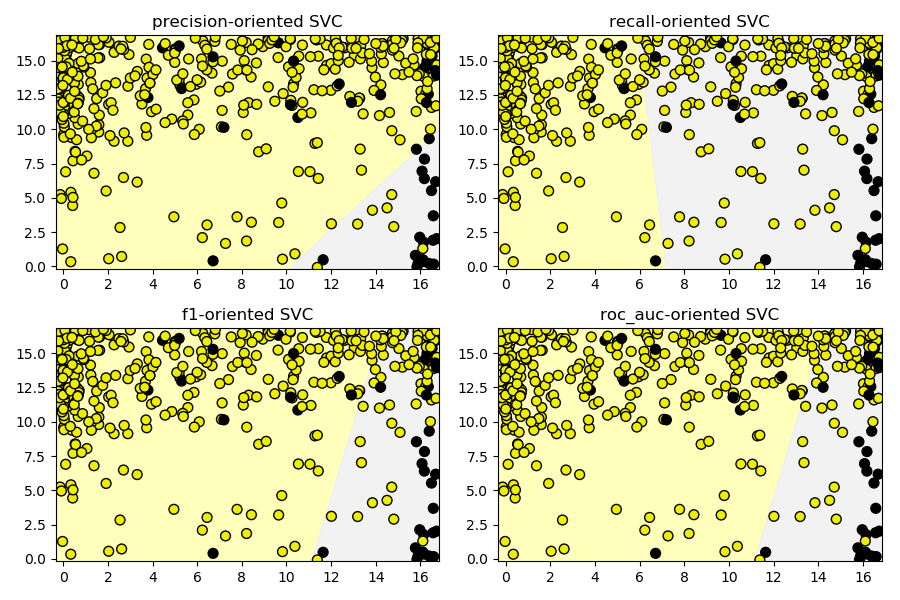

D:\Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.5381785230796104


D:\Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9428915594801756


D:\Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. f1): {'class_weight': {1: 4}}
Grid best score (f1): 0.5076127597618202


D:\Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. roc_auc): {'class_weight': {1: 4}}
Grid best score (roc_auc): 0.8894450522633621


In [30]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

#### Precision-recall curve for the default SVC classifier (with balanced class weights)

We can see the precision recall trade-off very clearly for this classification scenario in the precision recall curve for the default support vector classifier with linear kernel optimized for accuracy on the same dataset, and using the balanced option for the class weight parameter.

<IPython.core.display.Javascript object>


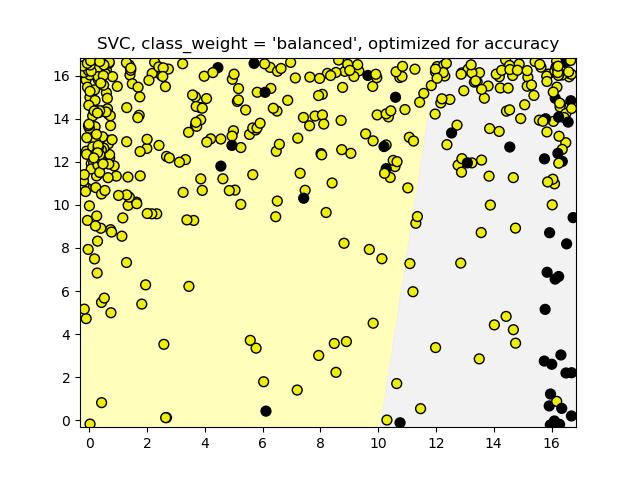

<IPython.core.display.Javascript object>


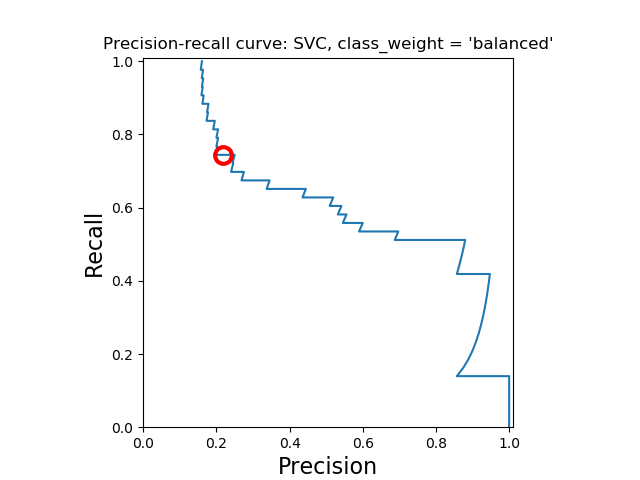

At zero threshold, precision: 0.22, recall: 0.74


D:\Python\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))

The extreme lower right part of the curve on this precision recall curve represents a decision boundary that's highly precision-oriented in the lower right of the classification plot, where there's a cluster of positive examples. As the decision threshold is shifted to become less and less conservative, tracing the curve up into the left, the classifier becomes more and more like the recall-oriented support vector classifier example.

Again, the red circle represents the precision recall trade-off achieved at the zero score mark, which is the actual decision boundary chosen for the trained classifier.